In [130]:
%% Machine Learning Online Class
%  Exercise 1: Linear regression with multiple variables
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  linear regression exercise. 
%
%  You will need to complete the following functions in this 
%  exericse:
%
%     warmUpExercise.m
%     plotData.m
%     gradientDescent.m
%     computeCost.m
%     gradientDescentMulti.m
%     computeCostMulti.m
%     featureNormalize.m
%     normalEqn.m
%
%  For this part of the exercise, you will need to change some
%  parts of the code below for various experiments (e.g., changing
%  learning rates).
%

%% Initialization
%% Clear and Close Figures
clear ; close all; clc


In [131]:
%% ================ Part 1: Feature Normalization ================

fprintf('Loading data ...\n');

%% Load Data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

%fprintf('Program paused. Press enter to continue.\n');
%pause;

% Scale features and set them to zero mean
fprintf('Normalizing Features ...\n');

[X mu sigma] = featureNormalize(X);
fprintf(' x = [%.2f %.2f], y = %.2f \n', [X(1:10,:) y(1:10,:)]');

% Add intercept term to X
X = [ones(m, 1) X];


Loading data ...
First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 
Normalizing Features ...
 x = [0.13 -0.22], y = 399900.00 
 x = [-0.50 -0.22], y = 329900.00 
 x = [0.50 -0.22], y = 369000.00 
 x = [-0.74 -1.54], y = 232000.00 
 x = [1.26 1.09], y = 539900.00 
 x = [-0.02 1.09], y = 299900.00 
 x = [-0.59 -0.22], y = 314900.00 
 x = [-0.72 -0.22], y = 198999.00 
 x = [-0.78 -0.22], y = 212000.00 
 x = [-0.64 -0.22], y = 242500.00 


Running gradient descent ...
Theta computed from gradient descent: 
 340412.6130 
 110551.5401 
 -6569.9641 

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $293098.719001


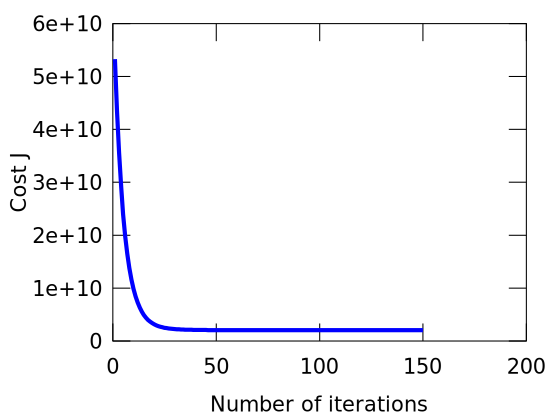

In [132]:
%% ================ Part 2: Gradient Descent ================

% ====================== YOUR CODE HERE ======================
% Instructions: We have provided you with the following starter
%               code that runs gradient descent with a particular
%               learning rate (alpha). 
%
%               Your task is to first make sure that your functions - 
%               computeCost and gradientDescent already work with 
%               this starter code and support multiple variables.
%
%               After that, try running gradient descent with 
%               different values of alpha and see which one gives
%               you the best result.
%
%               Finally, you should complete the code at the end
%               to predict the price of a 1650 sq-ft, 3 br house.
%
% Hint: By using the 'hold on' command, you can plot multiple
%       graphs on the same figure.
%
% Hint: At prediction, make sure you do the same feature normalization.
%

fprintf('Running gradient descent ...\n');

% Choose some alpha value
num_iters = 150;
alpha = 0.1;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');

% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %.4f \n', theta);
fprintf('\n');

% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
% Recall that the first column of X is all-ones. Thus, it does
% not need to be normalized.
price = [1, (1650-mu(1))/sigma(1), (3-mu(2))/sigma(2)] * theta; % You should change this


% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using gradient descent):\n $%f\n'], price);


In [133]:
%% ================ Part 3: Normal Equations ================

fprintf('Solving with normal equations...\n');

% ====================== YOUR CODE HERE ======================
% Instructions: The following code computes the closed form 
%               solution for linear regression using the normal
%               equations. You should complete the code in 
%               normalEqn.m
%
%               After doing so, you should complete this code 
%               to predict the price of a 1650 sq-ft, 3 br house.
%

%% Load Data
data = csvread('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);
fprintf('\n');


% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
price = [1, 1650, 3] * theta; % You should change this


% ============================================================

fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);


Solving with normal equations...
theta =

   8.9598e+04
   1.3921e+02
  -8.7380e+03

Theta computed from the normal equations: 
 89597.909543 
 139.210674 
 -8738.019112 

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
